# EDA

In [1]:
# Load the Dataframe from Nootbook 01 and 02

%store -r features_x df_model
df = df_model.copy()

In [2]:
# Ignore warnings

import warnings
warnings.filterwarnings('ignore')

#Data handling

import pandas as pd
import numpy as np


#Plotting

import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt

sns.set_style(
    style='darkgrid', 
    rc={'axes.facecolor': '.9', 'grid.color': '.8'}
)
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.dpi'] = 100

## Question: Are the Promos effective?

In [3]:
df.groupby('storetype')['sales'].describe()

,count,mean,std,min,25%,50%,75%,max
storetype,,,,,,,,
0,457042.0,6925.697986,3277.351589,46.0,4695.25,6285.0,8406.00,41551.0
1,15560.0,10233.380141,5155.729868,1252.0,6345.75,9130.0,13184.25,38722.0
2,112968.0,6933.126425,2896.958579,133.0,4916.00,6408.0,8349.25,31448.0
3,258768.0,6822.300064,2556.401455,538.0,5050.00,6395.0,8123.25,38037.0


In [4]:
df.groupby('storetype')['customers', 'sales'].sum()

,customers,sales
storetype,,
0,363541431.0,3.165335e+09
1,31465616.0,1.592314e+08
2,92129705.0,7.832214e+08
3,156904995.0,1.765393e+09


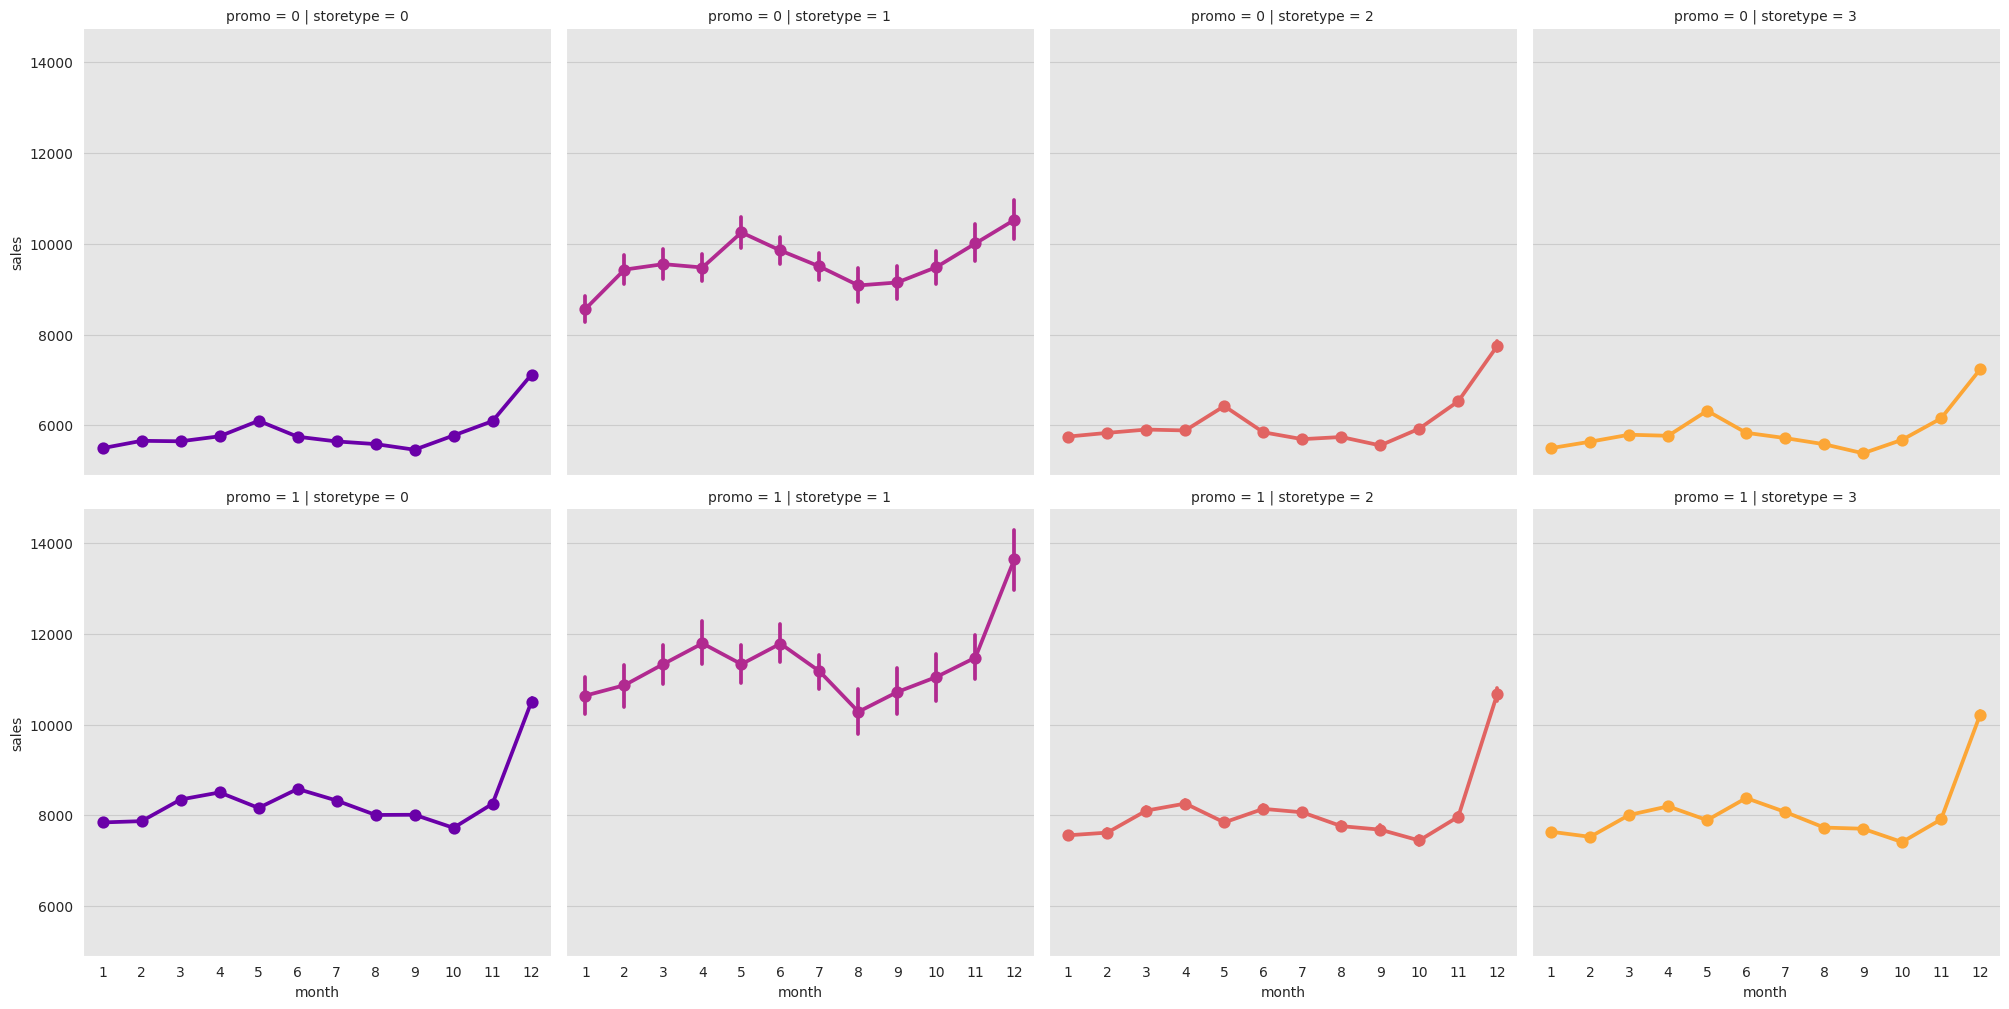

In [5]:
# sales trends
sns.factorplot(data = df, x = 'month', y = "sales", 
               col = 'storetype',
               palette = 'plasma',
               hue = 'storetype',
               row = 'promo', 
               ) ;

## Finding

- Storetype B has the highest sales numbers, with the largest variance. All storetypes show increased sales numbers towards christmas. 

- Stores which have run a promo, show higher sales. But storetypes a,c and d show a dip towards easter, if they have run a promo, which is not the case for stores without a promo.

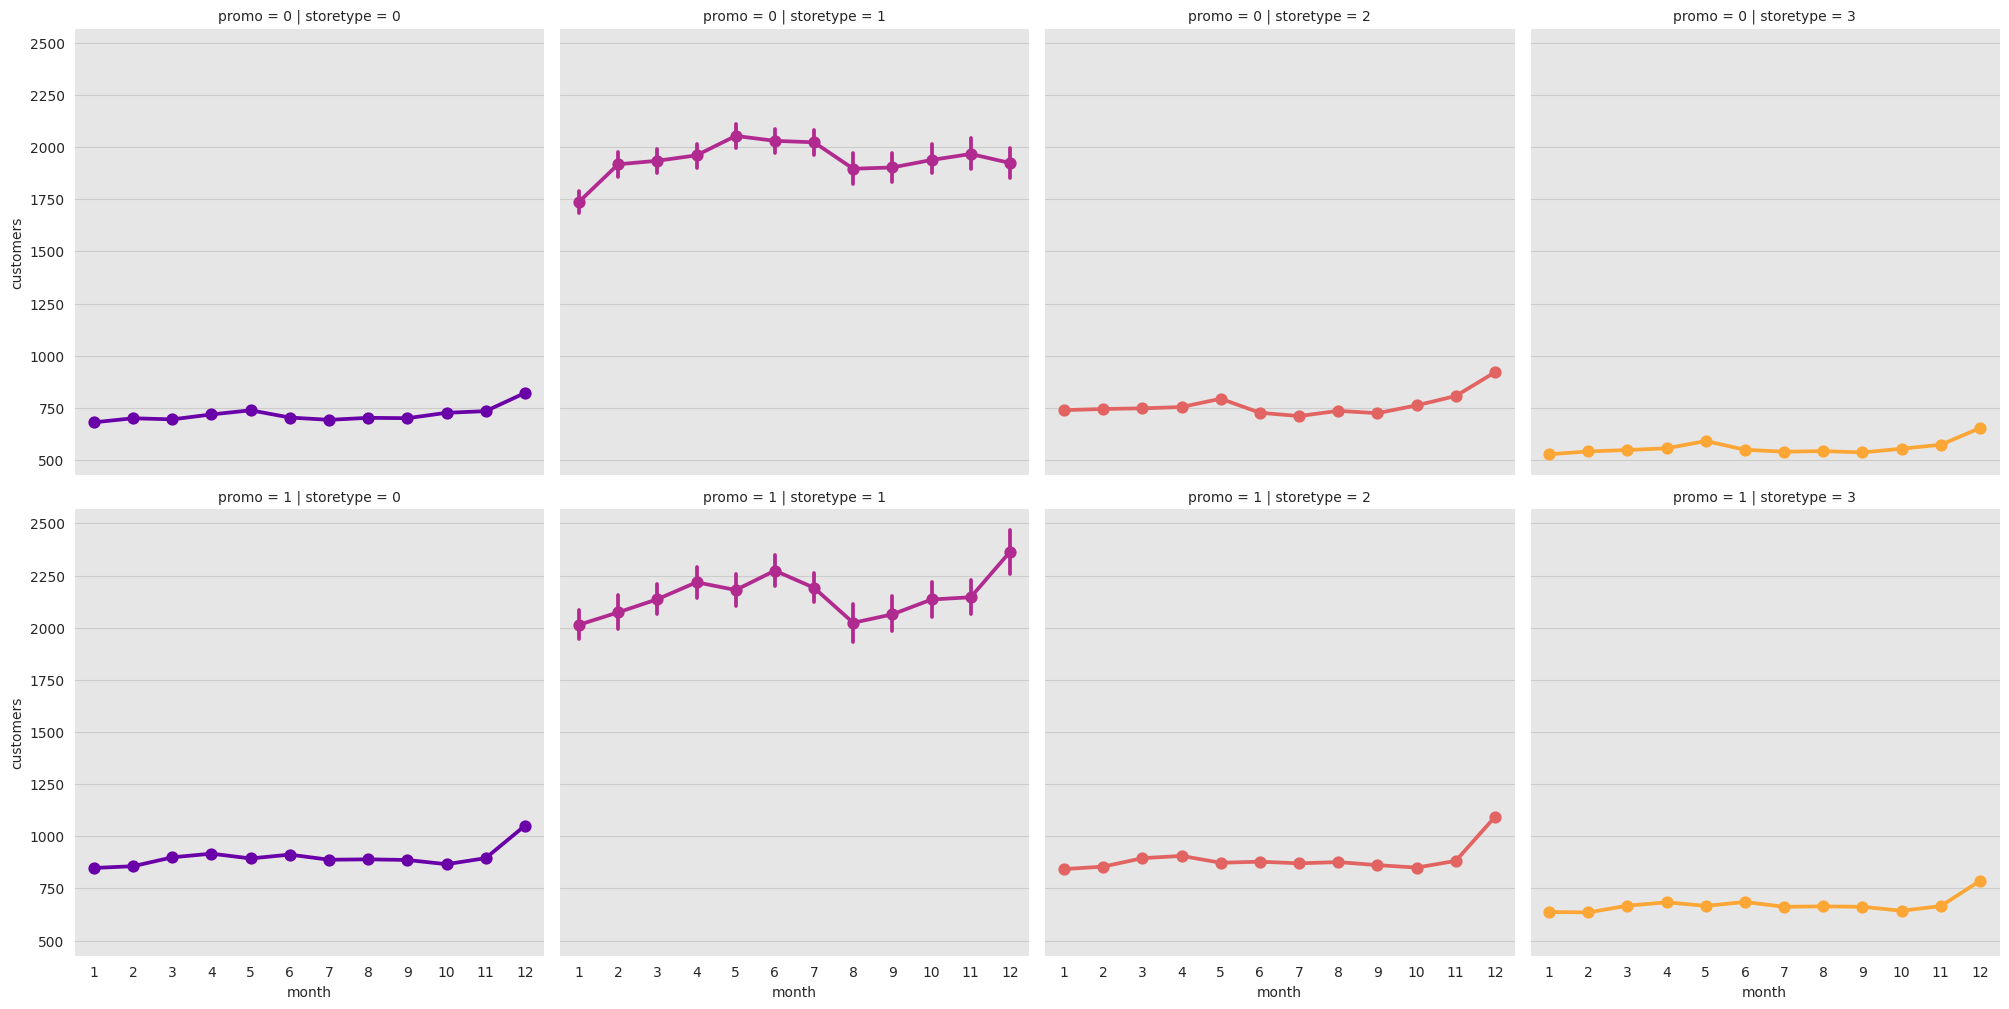

In [6]:
# customers trends
sns.factorplot(data = df, x = 'month', y = "customers", 
               col = 'storetype',
               palette = 'plasma',
               hue = 'storetype',
               row = 'promo',
               ) ;

## Finding

- Storetype B has the highest number of customers, with the largest variance. All storetypes show an increase of customers towards christmas. This trend is higher, if they have run a promo.

- Same effect of a dip for storetypes a,c and d in customers towards easter can be also be seen here.

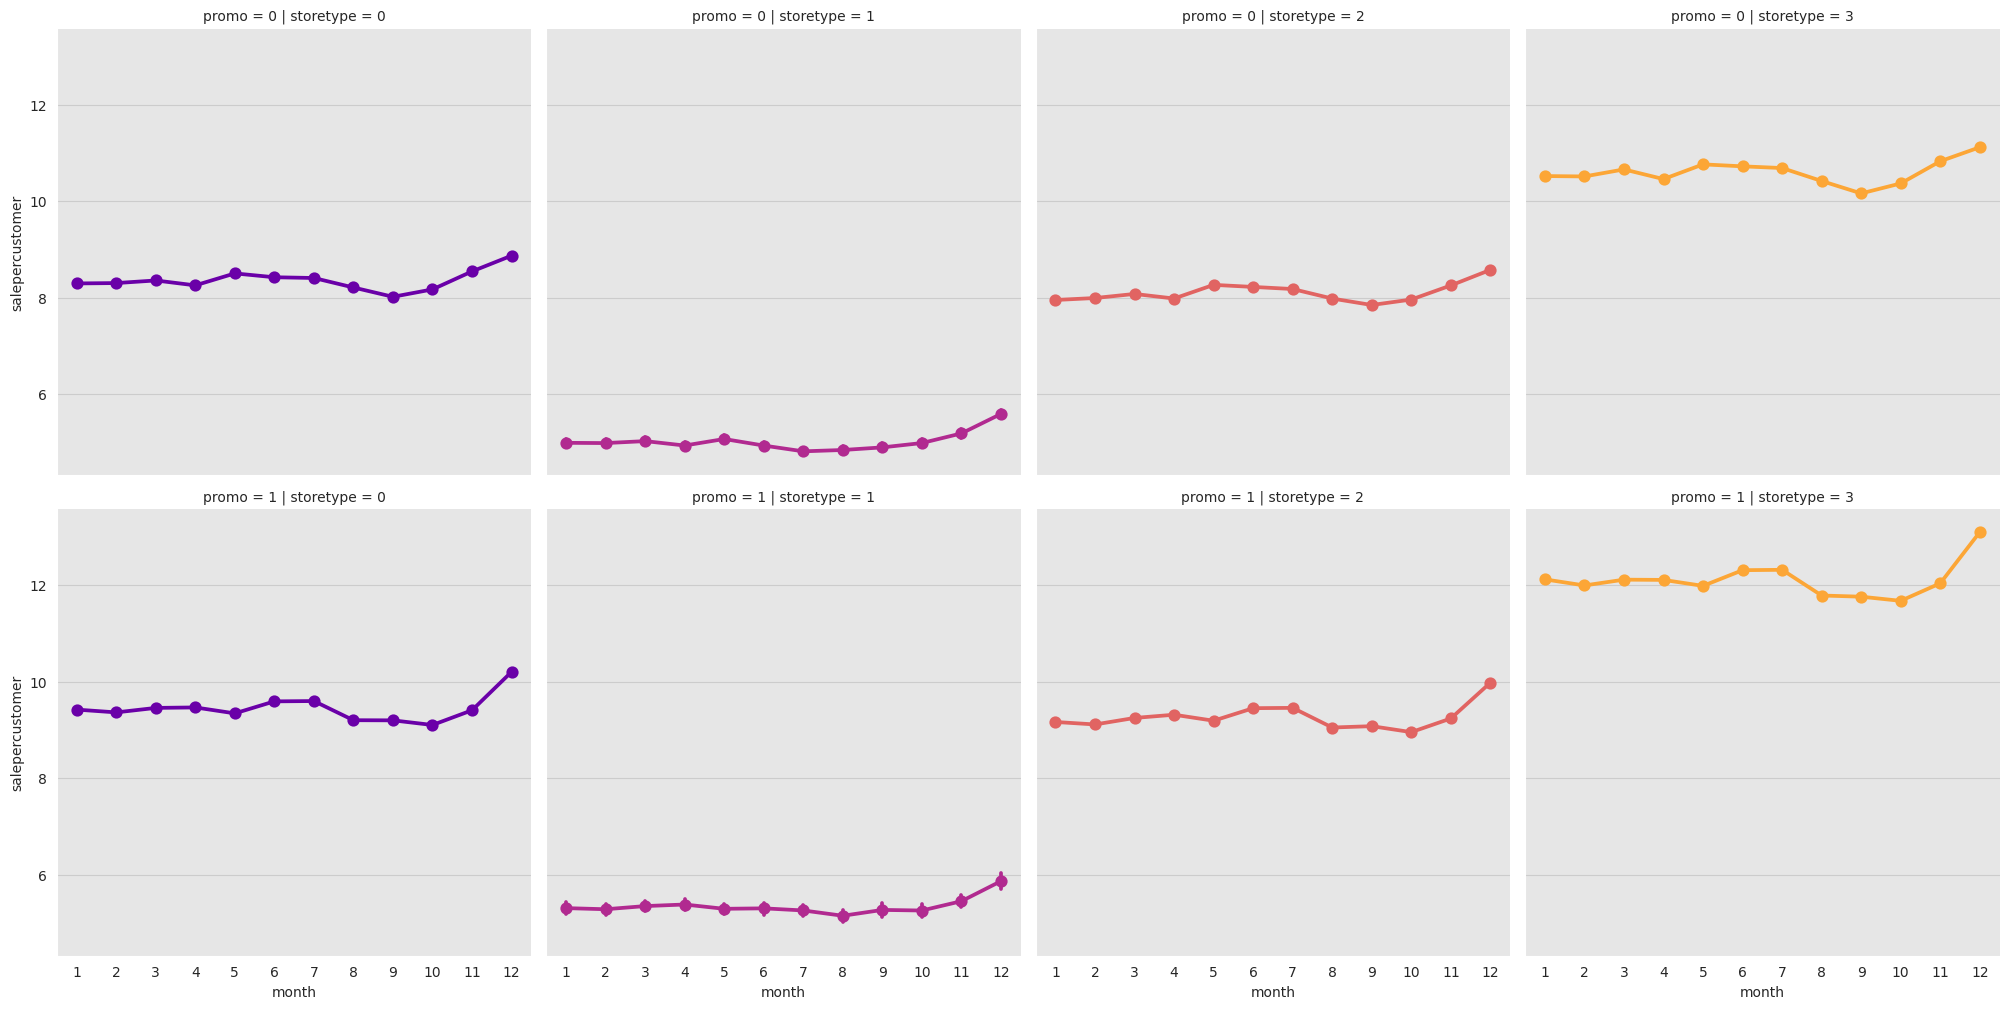

In [7]:
# sale per customer trends
df['salepercustomer'] = df['sales']/df['customers']
sns.factorplot(data = df, x = 'month', y = "salepercustomer", 
               col = 'storetype',
               palette = 'plasma',
               hue = 'storetype',
               row = 'promo', 
               ) ;

## Finding

Sales per customer:
storetype b seems to be where customers only buy small items in low numbers (possible trainstation location?)
storetype d customers buy the largest quantity
a und c are very similar

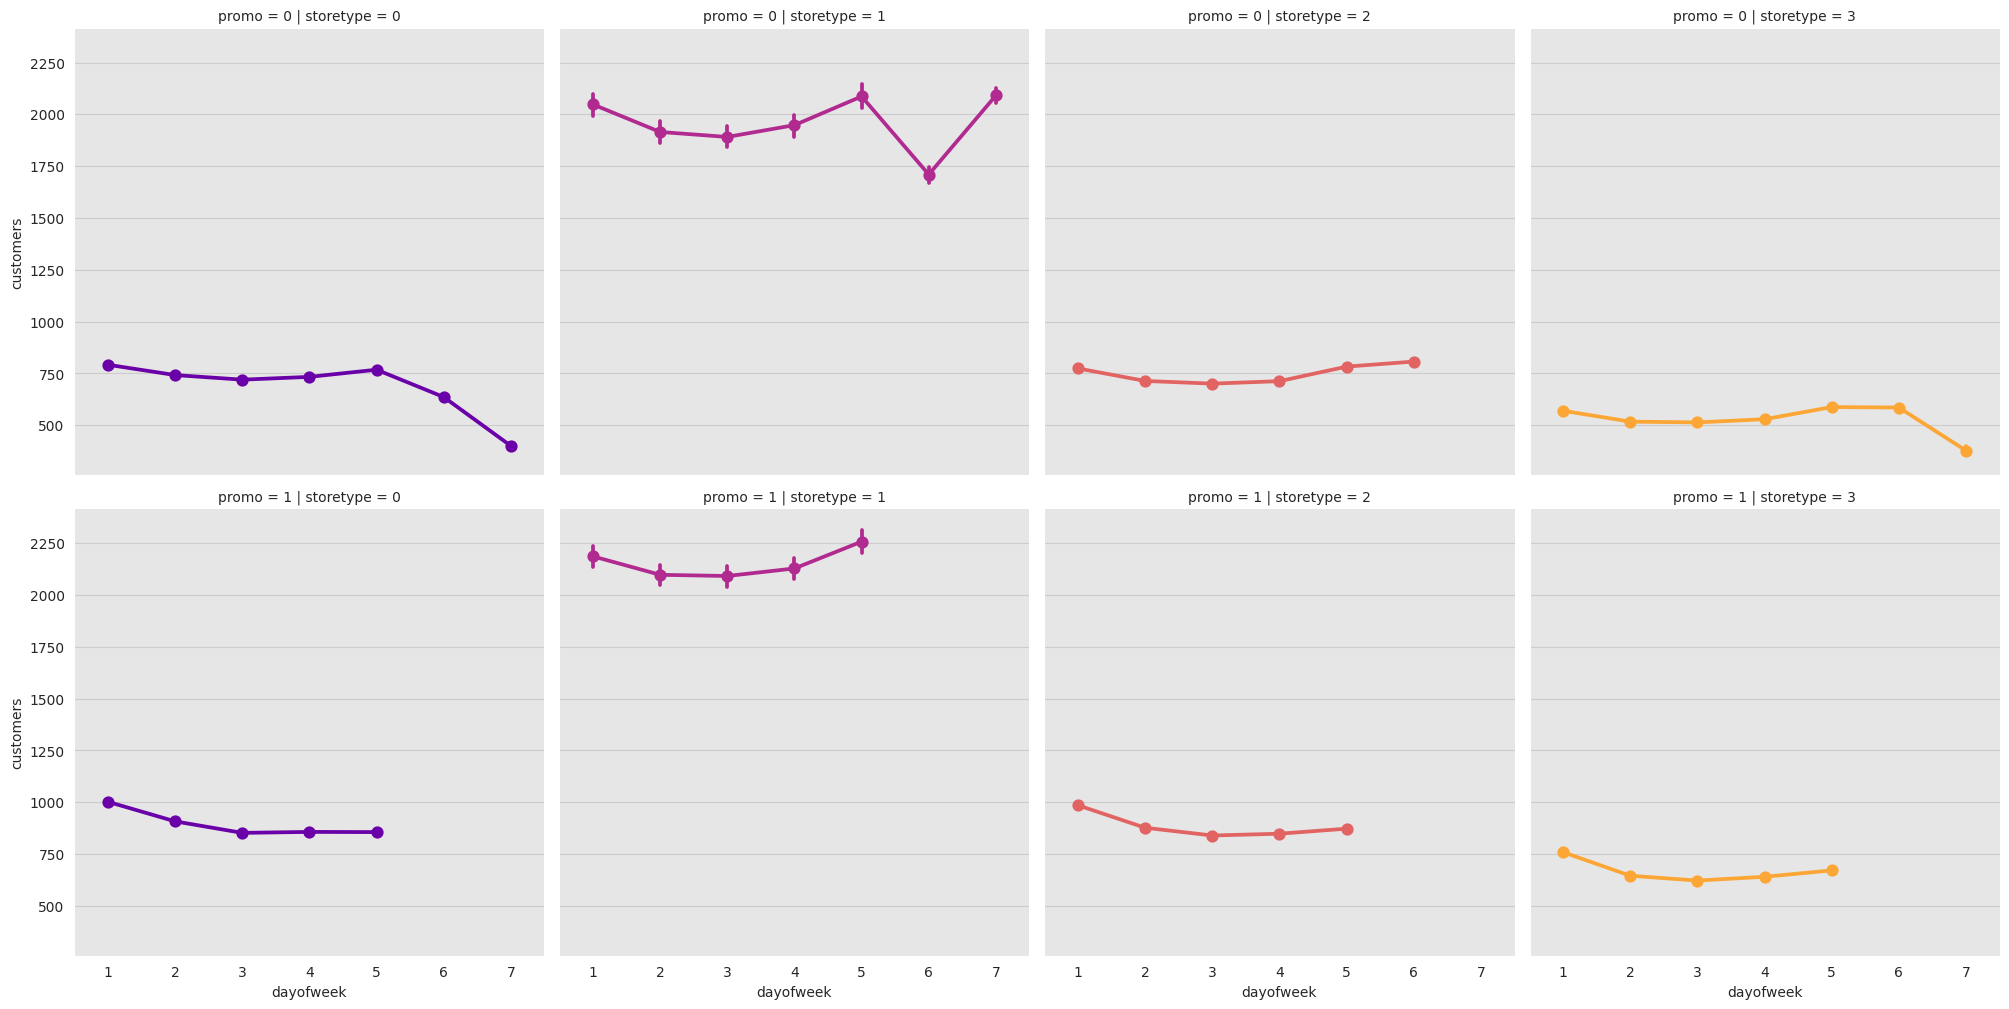

In [8]:
# weekday trends
sns.factorplot(data = df, x = 'dayofweek', y = "customers", 
               col = 'storetype',
               palette = 'plasma',
               hue = 'storetype',
               row = 'promo',
               ) ;

## Finding

- Promos are run only during the work-week, no promo on saturday/sunday.
- Storetype b also open on sundays -> trainstation, fo sho
- Storetyp a lower number of customers on saturday, c and d increased

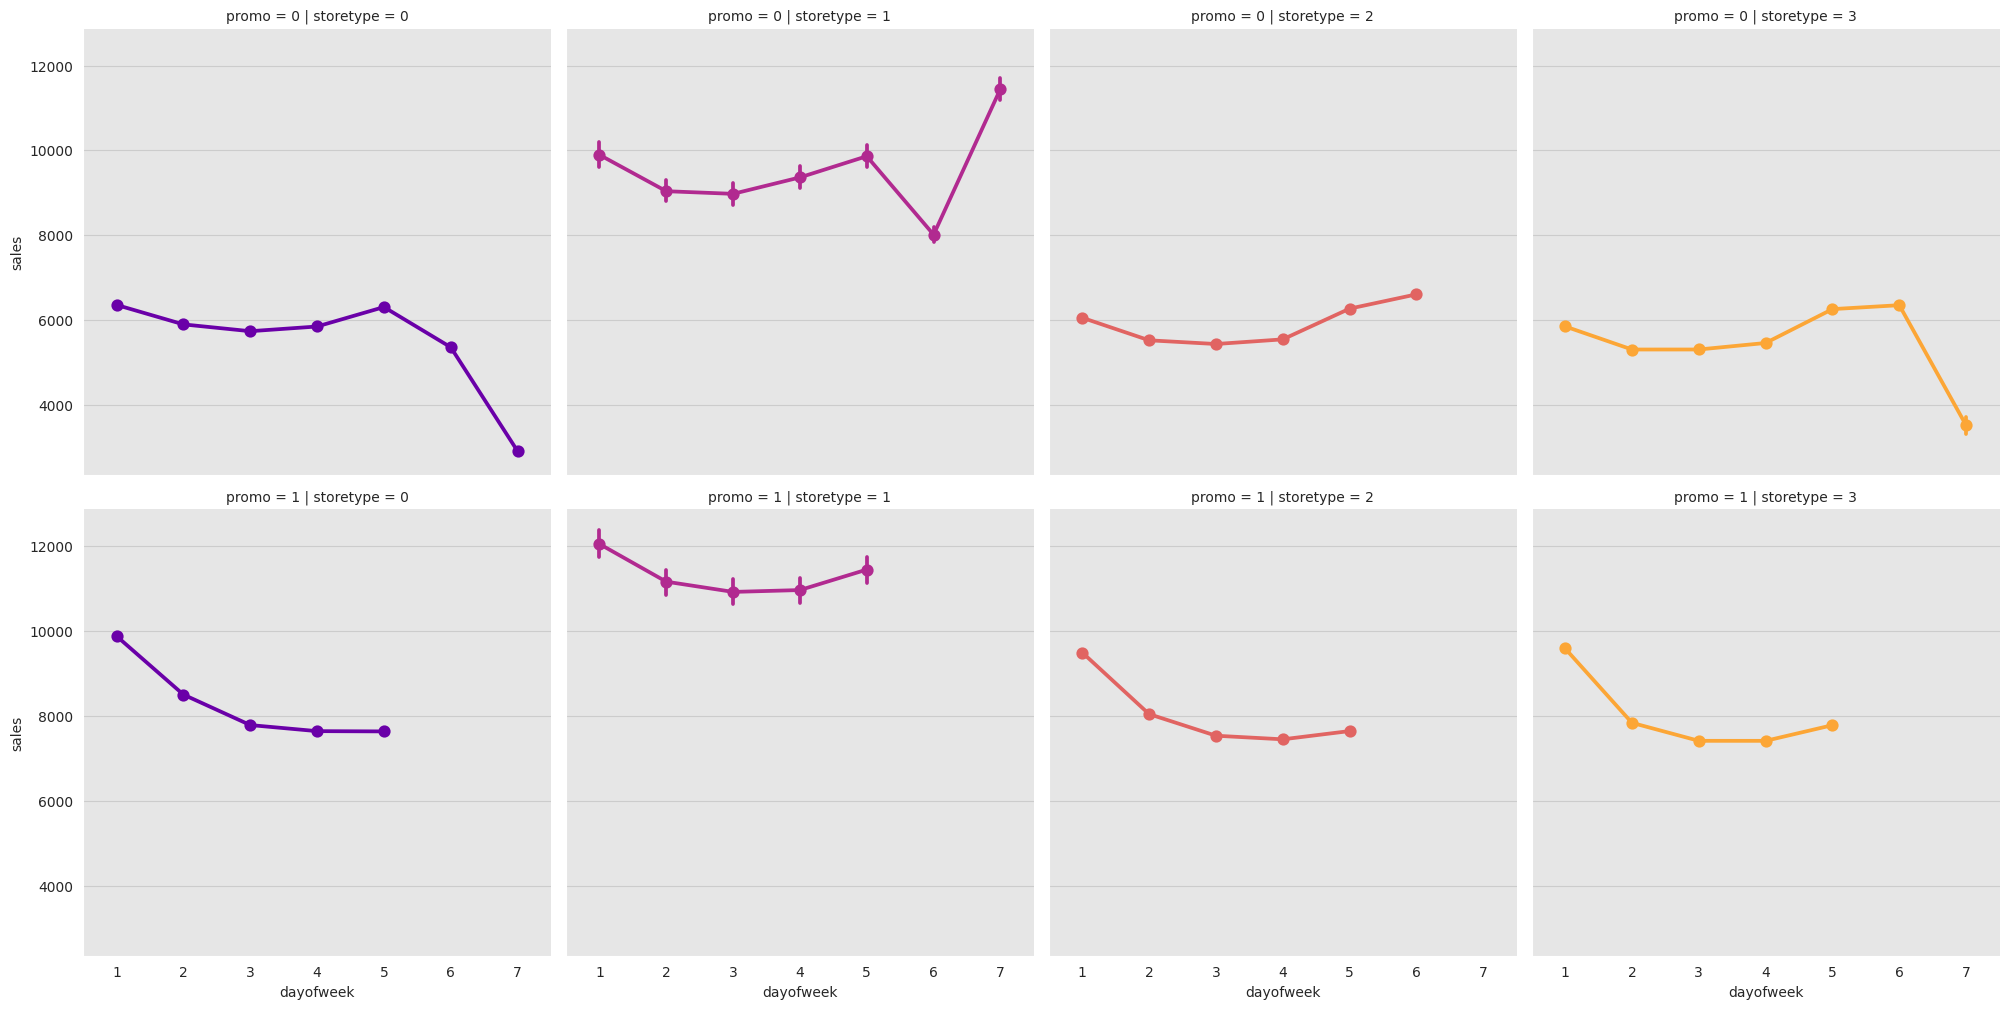

In [9]:
# weekday trends
sns.factorplot(data = df, x = 'dayofweek', y = "sales", 
               col = 'storetype',
               palette = 'plasma',
               hue = 'storetype',
               row = 'promo',
               ) ;

Similar trends regarding sales numbers and customers.
Highest number of sales and customers on mondays, if a promo was run

## Conclusion : Question: Are the Promos effective?
- Promos are run only during the work-week, no promo on saturday/sunday
- Storetype B has the highest number of customers, with the largest variance
- Storetype B has the highest sales numbers, with the largest variance
- All storetypes show increased sales numbers towards christmas
- Stores which have run a promo, show higher sales. But storetypes a, c and d show a dip towards easter, if they have run a promo, which is not the case for       stores without a promo

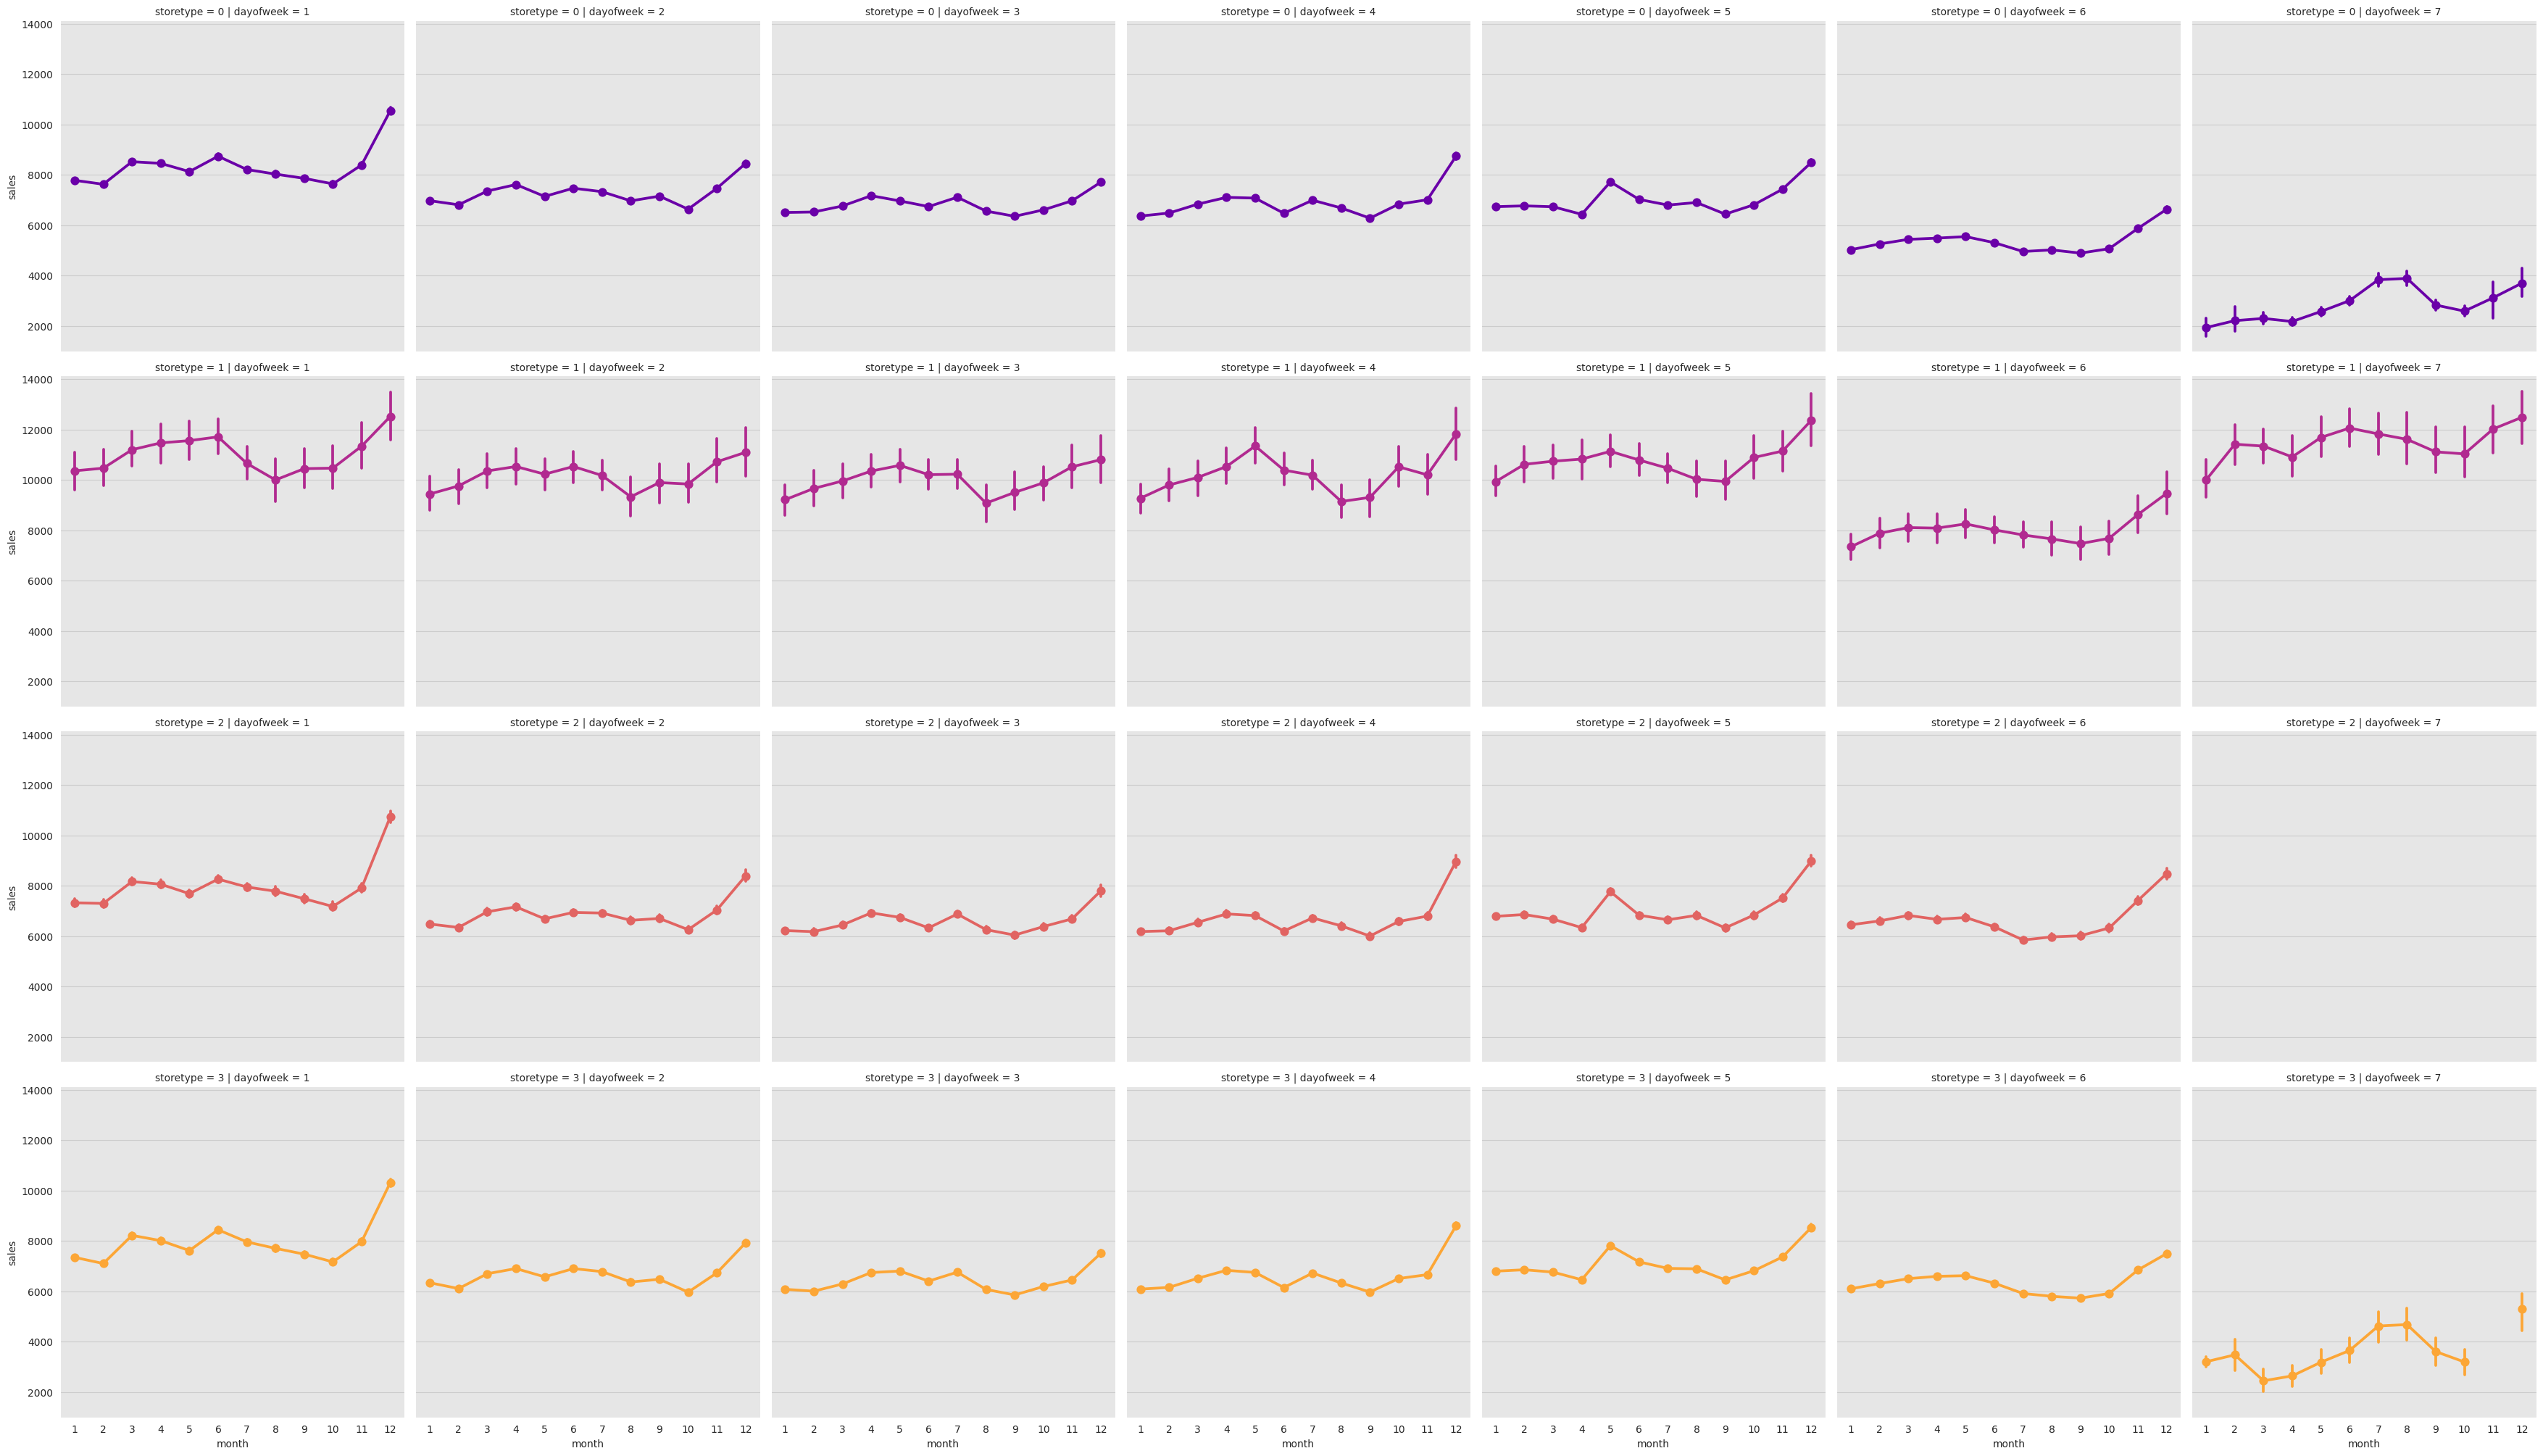

In [10]:
sns.factorplot(data = df, x = 'month', y = "sales", 
               col = 'dayofweek', 
               palette = 'plasma',
               hue = 'storetype',
               row = 'storetype',
               ) ;

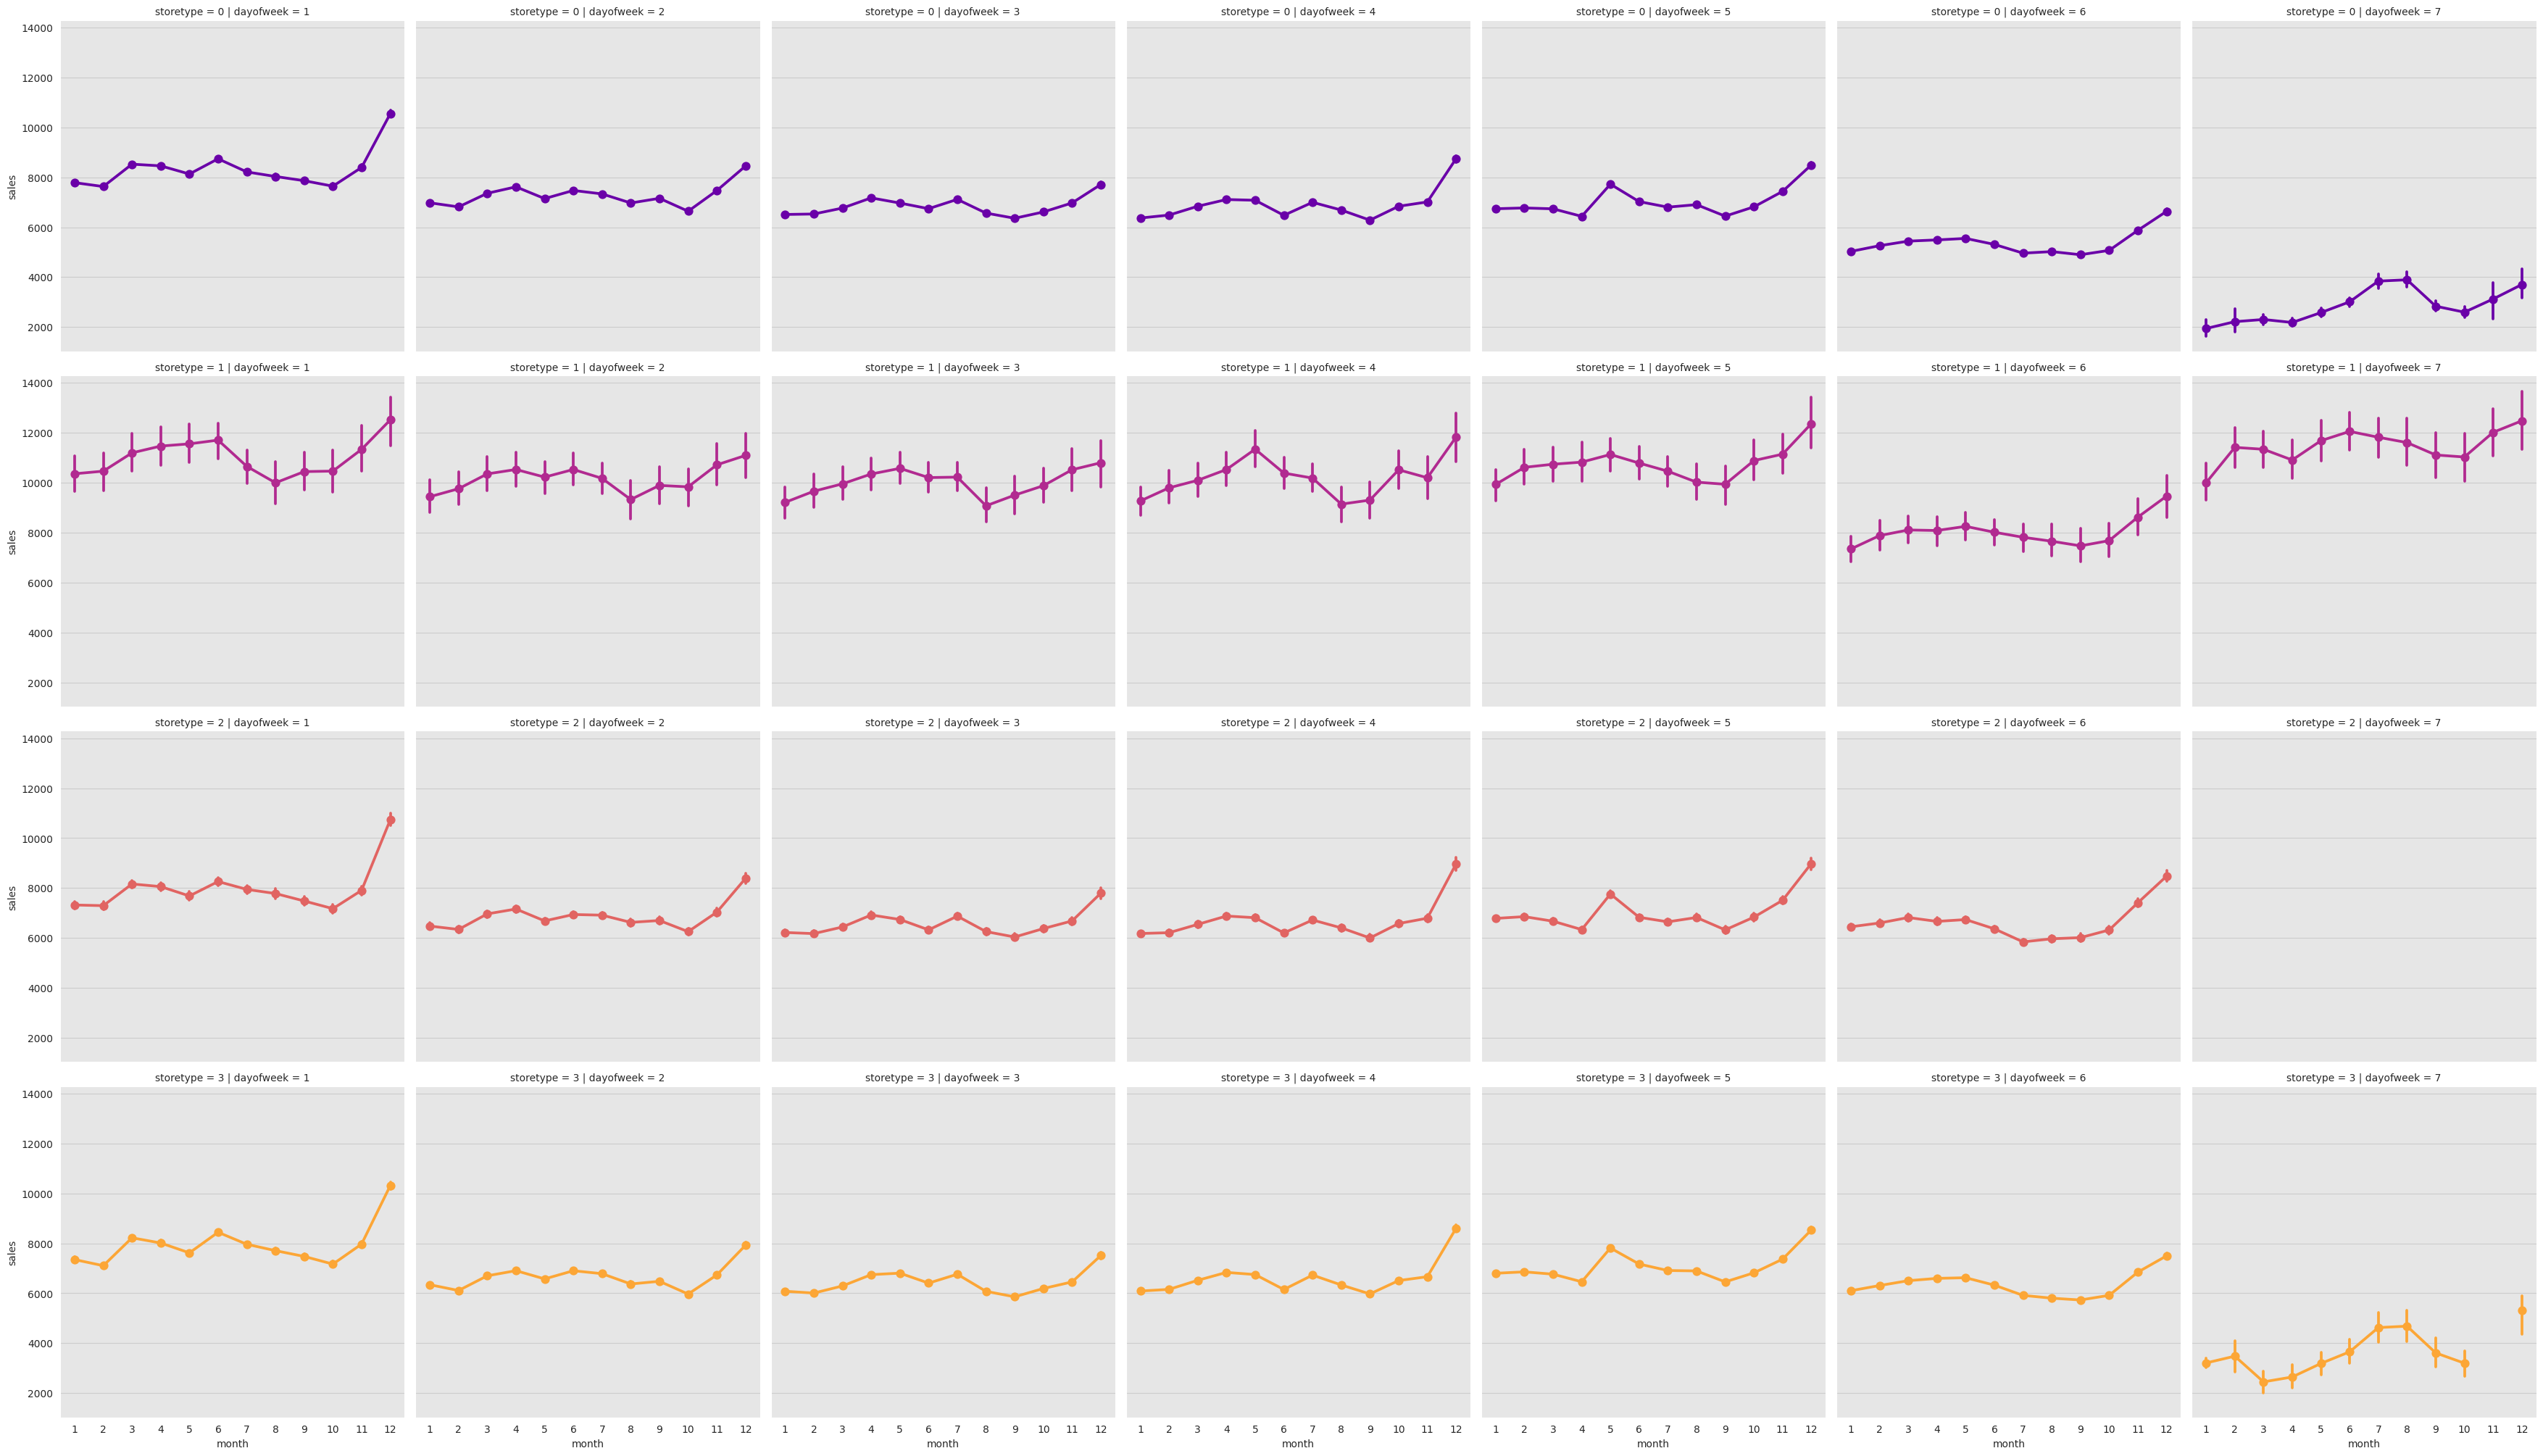

In [11]:
sns.factorplot(data = df, x = 'month', y = "sales", 
               col = 'dayofweek', 
               palette = 'plasma',
               hue = 'storetype',
               row = 'storetype',
               ) ;

## Aggregated Plots

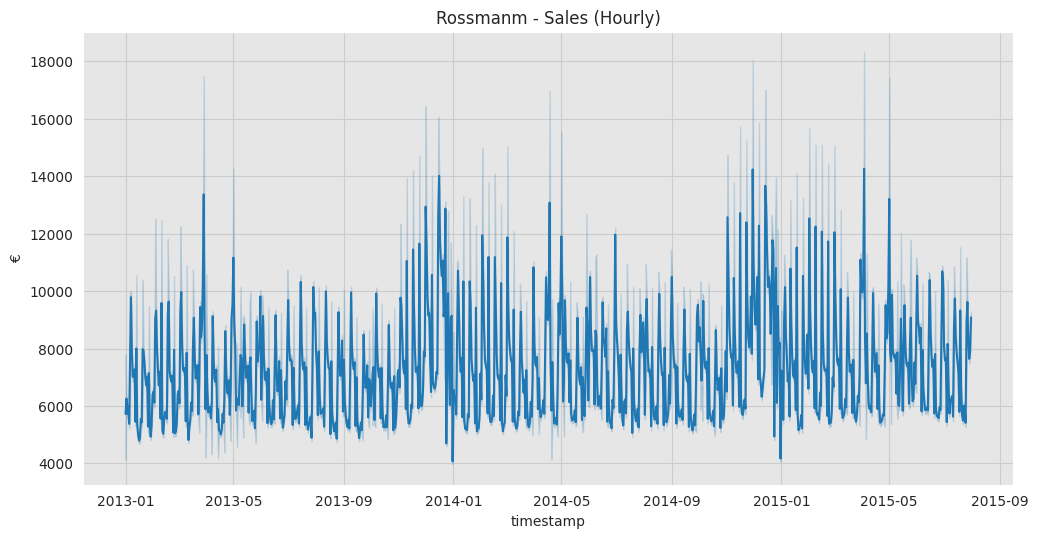

In [12]:
fig, ax = plt.subplots()
sns.lineplot(x='timestamp', y='sales', data=df, ax=ax)
ax.set(title='Rossmanm - Sales (Hourly)', ylabel="€");

In [13]:
# Aggregate Sales by day
daily_data_df = df \
    .groupby([ "timestamp",'year', 'month', 'day', 'dayofyear'], as_index=False)\
    .agg({'sales': np.mean}) \
    .set_index('timestamp')

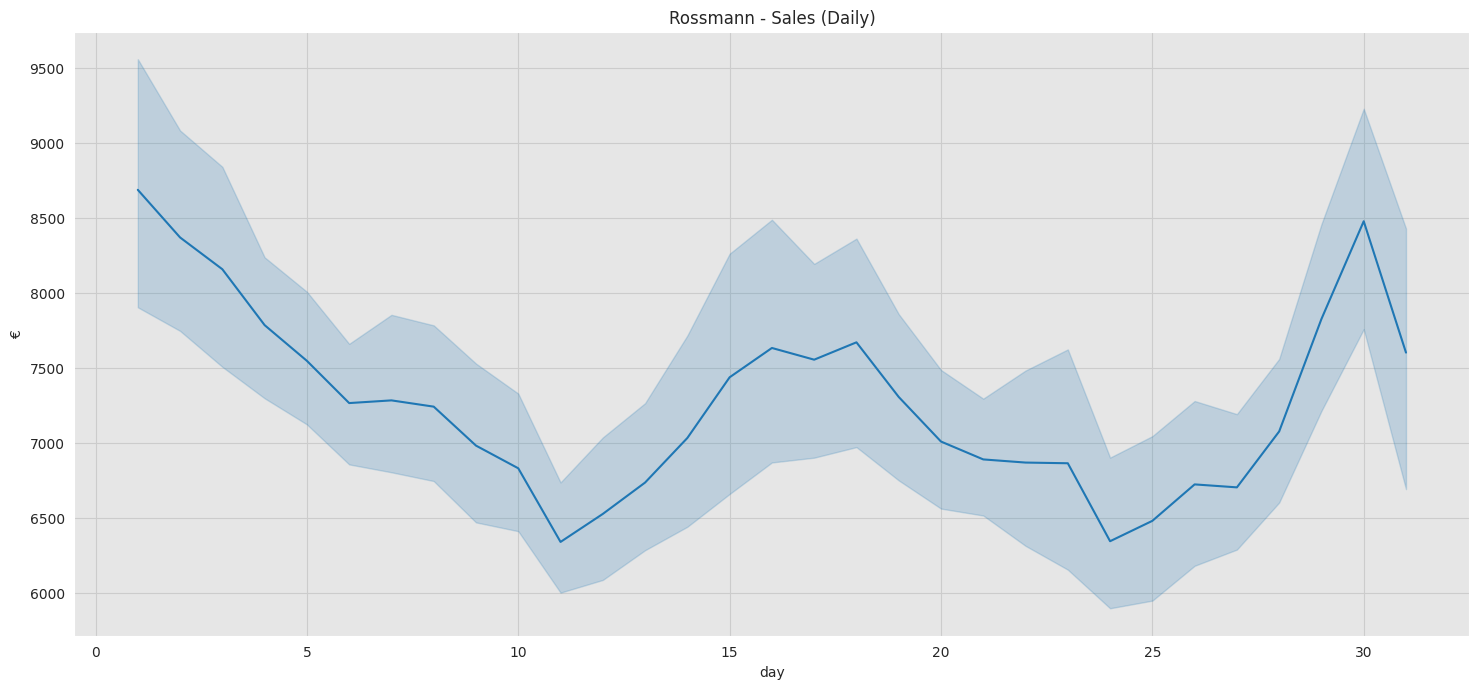

In [14]:
# Plot Sales on daily basis 
fig, ax = plt.subplots(figsize=(18,8))
sns.lineplot(x='day', y='sales', data=daily_data_df.reset_index(), ax=ax)
ax.set(title='Rossmann - Sales (Daily)', ylabel="€");

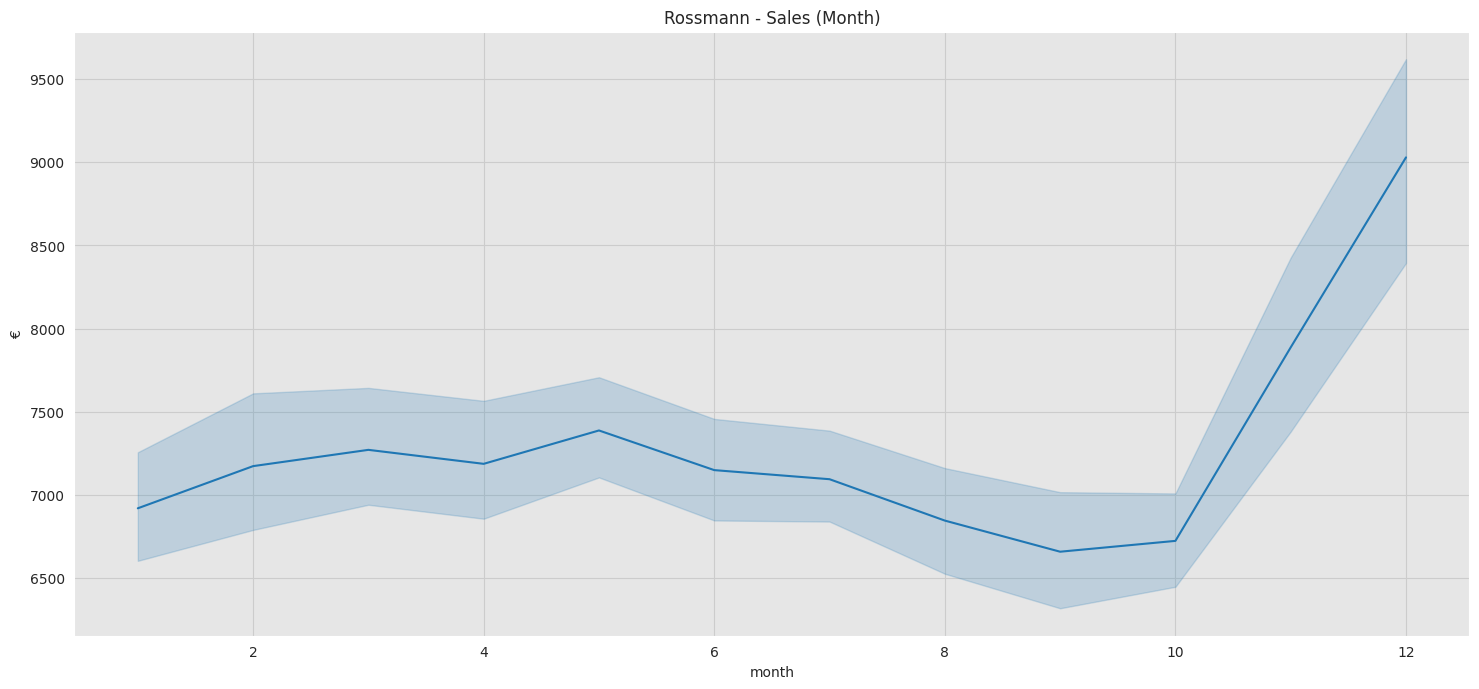

In [15]:
# Plot Sales on month basis 
fig, ax = plt.subplots(figsize=(18,8))
sns.lineplot(x='month', y='sales', data=daily_data_df.reset_index(), ax=ax)
ax.set(title='Rossmann - Sales (Month)', ylabel="€");

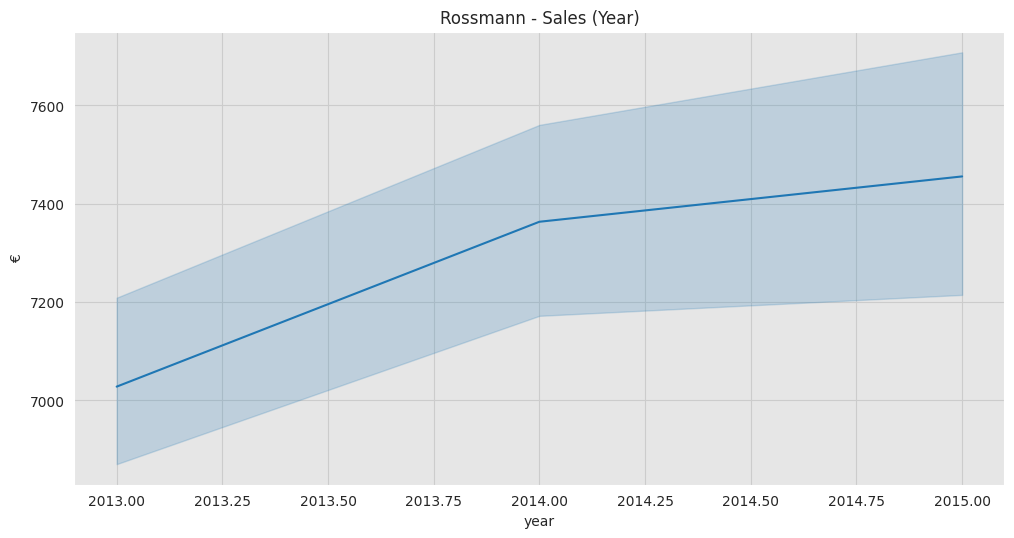

In [16]:
# Plot Sales on year basis 
fig, ax = plt.subplots()
sns.lineplot(x='year', y='sales', data=daily_data_df.reset_index(), ax=ax)
ax.set(title='Rossmann - Sales (Year)', ylabel="€");

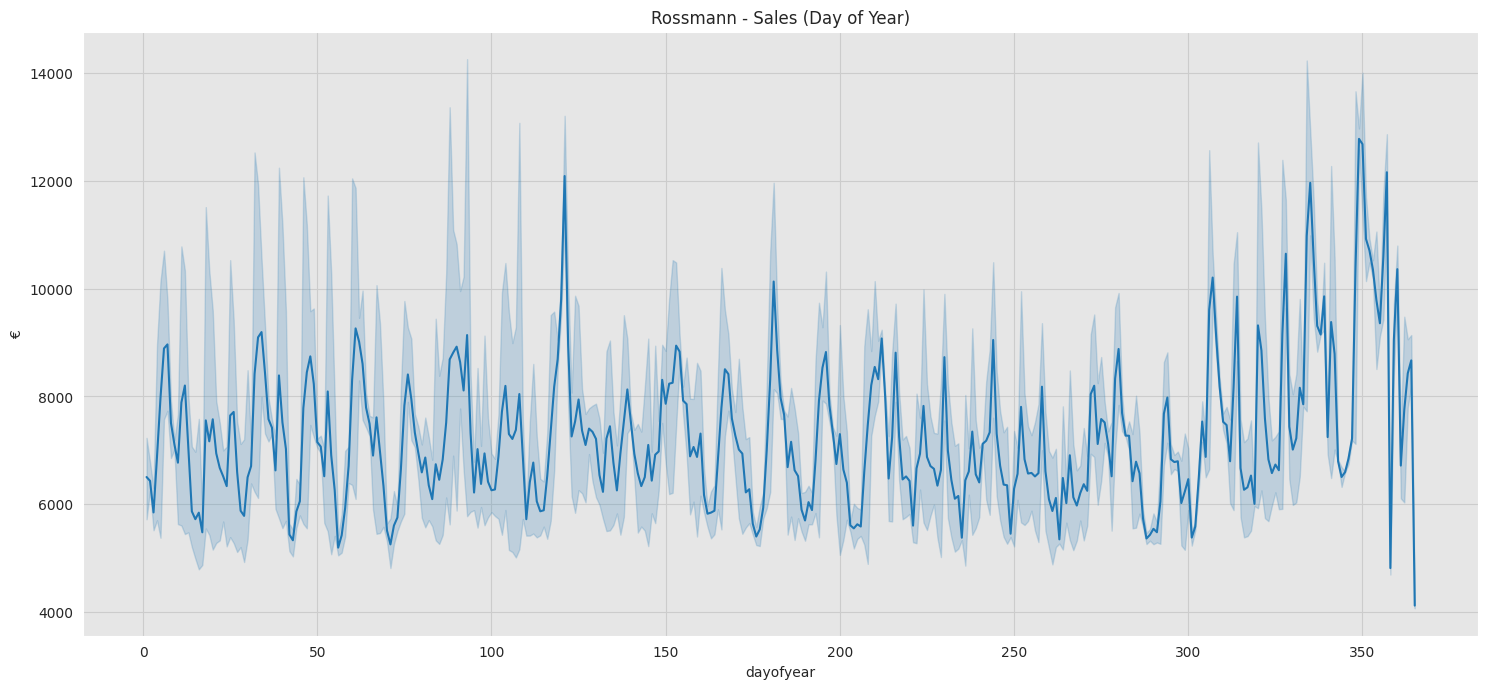

In [17]:
# Plot Sales on month basis 
fig, ax = plt.subplots(figsize=(18,8))
sns.lineplot(x='dayofyear', y='sales', data=daily_data_df.reset_index(), ax=ax)
ax.set(title='Rossmann - Sales (Day of Year)', ylabel="€");

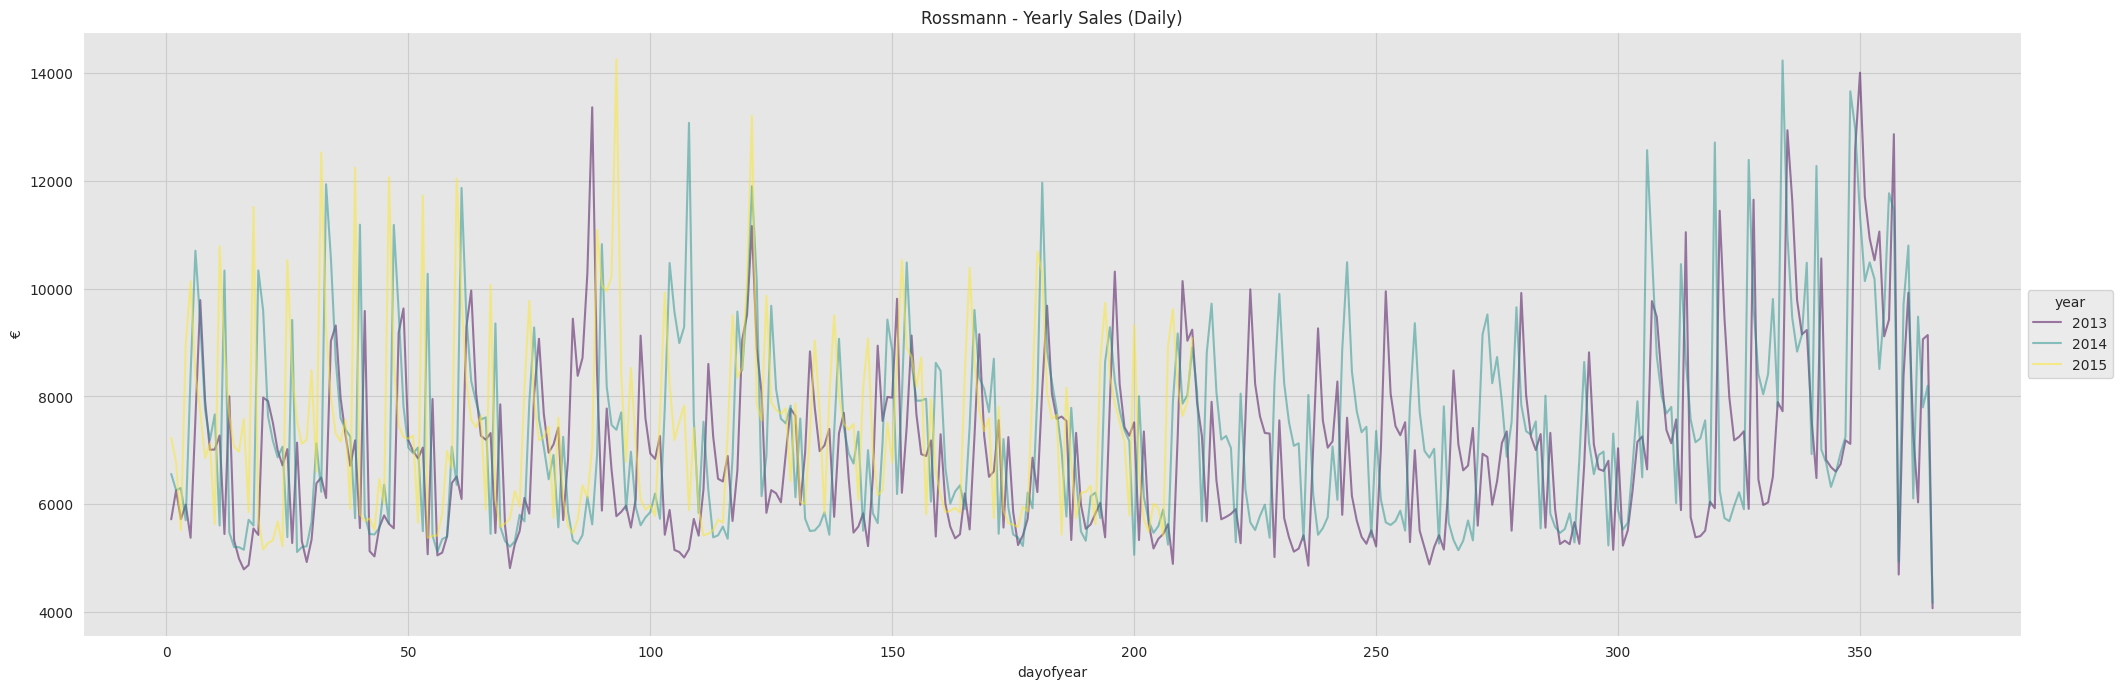

In [18]:
# Plot yearly seasonality
fig, ax = plt.subplots(figsize=(25,8)) 

pd.pivot_table(data=daily_data_df[['year', 'dayofyear', 'sales']], index='dayofyear', columns='year') \
    ['sales'] \
    .plot(cmap='viridis', alpha=0.5, ax=ax)

ax.legend(title='year', loc='center left', bbox_to_anchor=(1, 0.5))
ax.set(title='Rossmann - Yearly Sales (Daily)', ylabel="€");

In [19]:
%store daily_data_df

Stored 'daily_data_df' (DataFrame)
